In [5]:
import pandas as pd

from tms_risk.utils import get_subjects, get_tms_conditions, get_all_behavior
from tqdm.contrib.itertools import product
import seaborn as sns
import pingouin
import numpy as np
import matplotlib.pyplot as plt
import os.path as op
import pingouin as pg

bids_folder  = '/data/ds-tmsrisk'

stimulation_palette = sns.color_palette()[2:4]
stimulation_order = ['Vertex', 'IPS']

subjects = get_subjects(all_tms_conditions=True)

In [6]:
pars = []
keys = []

for sub, session, roi in product(subjects, [2,3], ['NPC1l', 'NPC1r', 'NPC2l', 'NPC2r', 'NPC3l', 'NPC3r', 'NTOl', 'NTOr', 'NF1l', 'NF1r', 'NF2l', 'NF2r', 'NPCr1cm-cluster', 'NPCr2cm-cluster']):

    try:
        pars.append(sub.get_prf_parameters_volume(session, smoothed=True, retroicor=False, denoise=True, cross_validated=False, natural_space=False, roi=roi, keys=['mu', 'sd', 'amplitude', 'cvr2']))
        keys.append((sub.subject, session, roi))
    except Exception as e:
        print(e)

pars = pd.concat(pars, keys=keys, names=['subject', 'session', 'roi'])
tms_conditions = get_tms_conditions()
for key in tms_conditions:
    tms_conditions[key][1] = 'baseline'

pars['stimulation_condition'] = pars.reset_index().apply(lambda d: tms_conditions[d['subject']][d['session']],  axis=1).values
pars = pars.set_index('stimulation_condition', append=True)
pars.index = pars.index.set_names('voxel', level=-2)


  0%|          | 0/980 [00:00<?, ?it/s]

In [8]:
cvr2 = pars.droplevel('session')['cvr2'].unstack('stimulation_condition')
mask = (cvr2 > 0.0).any(axis=1)

amplitude


,,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
roi,,,,,,,,,,,,
NPC1l,0,stimulation_condition,ips,vertex,True,True,-2.167160,34.0,two-sided,0.037320,1.427,-0.339702
NF1l,0,stimulation_condition,ips,vertex,True,True,-2.125252,34.0,two-sided,0.040913,1.325,-0.445529
NPCr2cm-cluster,0,stimulation_condition,ips,vertex,True,True,-1.992434,34.0,two-sided,0.054401,1.054,-0.429145
NF2l,0,stimulation_condition,ips,vertex,True,True,-1.985250,34.0,two-sided,0.055231,1.041,-0.345153
NPC3l,0,stimulation_condition,ips,vertex,True,True,-1.742571,34.0,two-sided,0.090448,0.709,-0.376189
NPC2l,0,stimulation_condition,ips,vertex,True,True,-1.676199,34.0,two-sided,0.102873,0.642,-0.295950
NPCr1cm-cluster,0,stimulation_condition,ips,vertex,True,True,-1.668440,32.0,two-sided,0.104986,0.648,-0.405845
NF1r,0,stimulation_condition,ips,vertex,True,True,-1.296310,34.0,two-sided,0.203599,0.391,-0.268037
NPC1r,0,stimulation_condition,ips,vertex,True,True,-1.259543,34.0,two-sided,0.216412,0.375,-0.238037


cvr2


,,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
roi,,,,,,,,,,,,
NPC2l,0,stimulation_condition,ips,vertex,True,True,-2.846827,34.0,two-sided,0.007435,5.504,-0.813954
NF1r,0,stimulation_condition,ips,vertex,True,True,-2.618613,34.0,two-sided,0.013091,3.401,-0.781546
NPC3r,0,stimulation_condition,ips,vertex,True,True,-2.519972,34.0,two-sided,0.016599,2.785,-0.772623
NPCr2cm-cluster,0,stimulation_condition,ips,vertex,True,True,-2.055577,34.0,two-sided,0.047568,1.173,-0.614894
NPC1l,0,stimulation_condition,ips,vertex,True,True,-2.045778,34.0,two-sided,0.048576,1.154,-0.600669
NPC1r,0,stimulation_condition,ips,vertex,True,True,-1.609088,34.0,two-sided,0.116844,0.584,-0.468910
NPC3l,0,stimulation_condition,ips,vertex,True,True,-1.541279,34.0,two-sided,0.132506,0.532,-0.465169
NTOl,0,stimulation_condition,ips,vertex,True,True,-1.038170,34.0,two-sided,0.306518,0.298,-0.306511
NPC2r,0,stimulation_condition,ips,vertex,True,True,-0.981283,34.0,two-sided,0.333385,0.283,-0.282691


mu


,,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
roi,,,,,,,,,,,,
NPC1l,0,stimulation_condition,ips,vertex,True,True,1.728813,34.0,two-sided,0.092915,0.694,0.291730
NPC1r,0,stimulation_condition,ips,vertex,True,True,1.473743,34.0,two-sided,0.149750,0.486,0.305487
NF2r,0,stimulation_condition,ips,vertex,True,True,-1.427913,34.0,two-sided,0.162439,0.458,-0.263645
NTOl,0,stimulation_condition,ips,vertex,True,True,1.253331,34.0,two-sided,0.218636,0.372,0.224784
NPCr1cm-cluster,0,stimulation_condition,ips,vertex,True,True,1.177383,32.0,two-sided,0.247726,0.351,0.248435
NF1l,0,stimulation_condition,ips,vertex,True,True,1.127664,34.0,two-sided,0.267357,0.325,0.169925
NPCr2cm-cluster,0,stimulation_condition,ips,vertex,True,True,1.006935,34.0,two-sided,0.321079,0.289,0.192621
NPC2r,0,stimulation_condition,ips,vertex,True,True,0.712408,34.0,two-sided,0.481073,0.23,0.129432
NTOr,0,stimulation_condition,ips,vertex,True,True,0.624454,34.0,two-sided,0.536498,0.217,0.092076


sd


,,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
roi,,,,,,,,,,,,
NPCr2cm-cluster,0,stimulation_condition,ips,vertex,True,True,1.278041,34.0,two-sided,0.209892,0.383,0.252287
NPC2r,0,stimulation_condition,ips,vertex,True,True,1.271180,34.0,two-sided,0.212293,0.38,0.233933
NPC3r,0,stimulation_condition,ips,vertex,True,True,1.039210,34.0,two-sided,0.306041,0.298,0.207370
NPC3l,0,stimulation_condition,ips,vertex,True,True,1.007375,34.0,two-sided,0.320871,0.29,0.225425
NPC2l,0,stimulation_condition,ips,vertex,True,True,0.834927,34.0,two-sided,0.409587,0.25,0.187991
NF2l,0,stimulation_condition,ips,vertex,True,True,-0.606361,34.0,two-sided,0.548302,0.215,-0.111910
NPC1r,0,stimulation_condition,ips,vertex,True,True,0.594727,34.0,two-sided,0.555963,0.214,0.138230
NF1l,0,stimulation_condition,ips,vertex,True,True,-0.586351,34.0,two-sided,0.561512,0.213,-0.110727
NF1r,0,stimulation_condition,ips,vertex,True,True,0.577346,34.0,two-sided,0.567510,0.212,0.089742


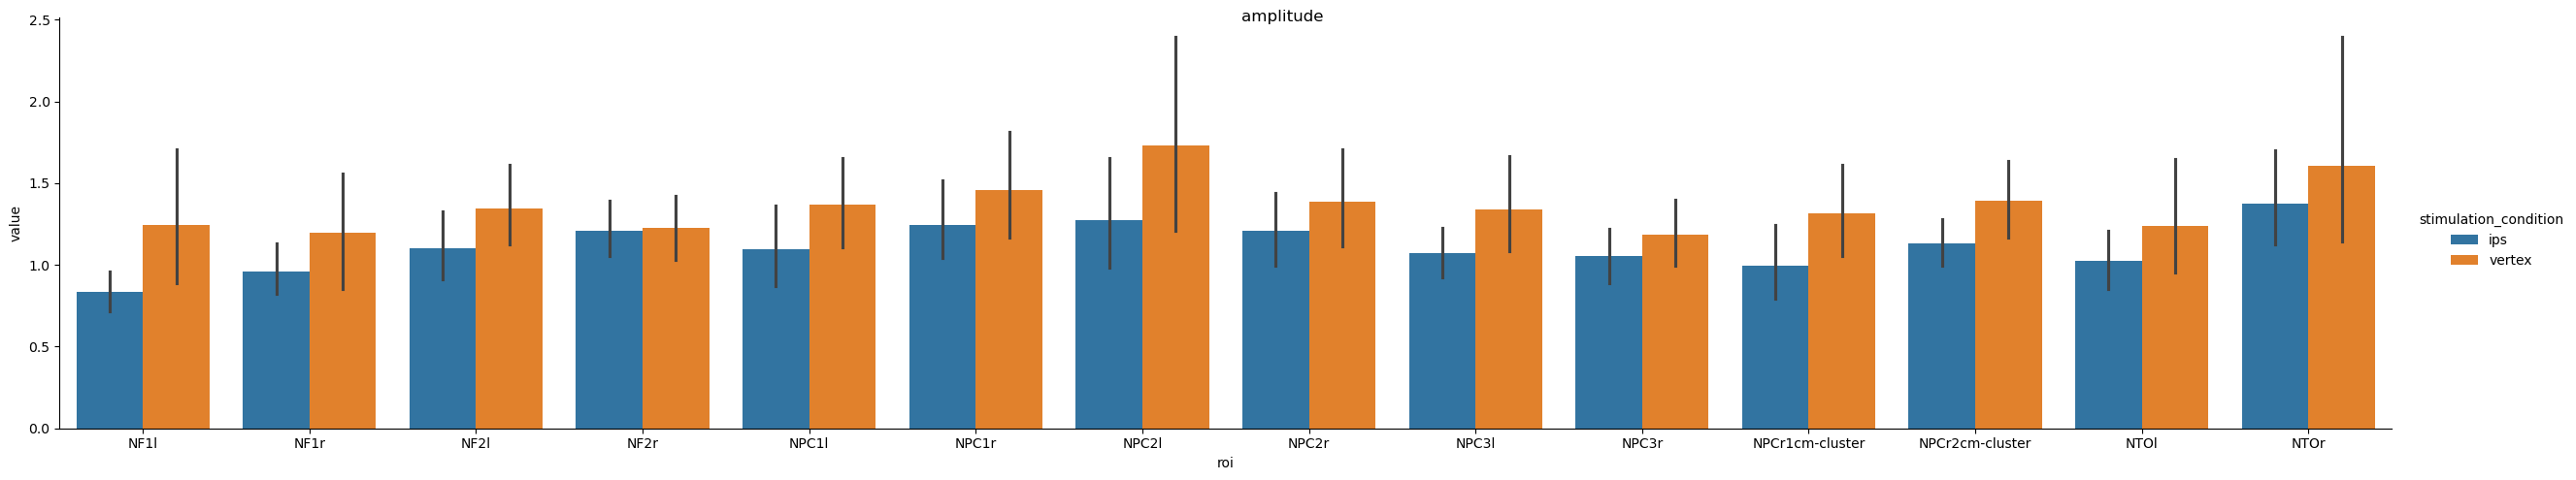

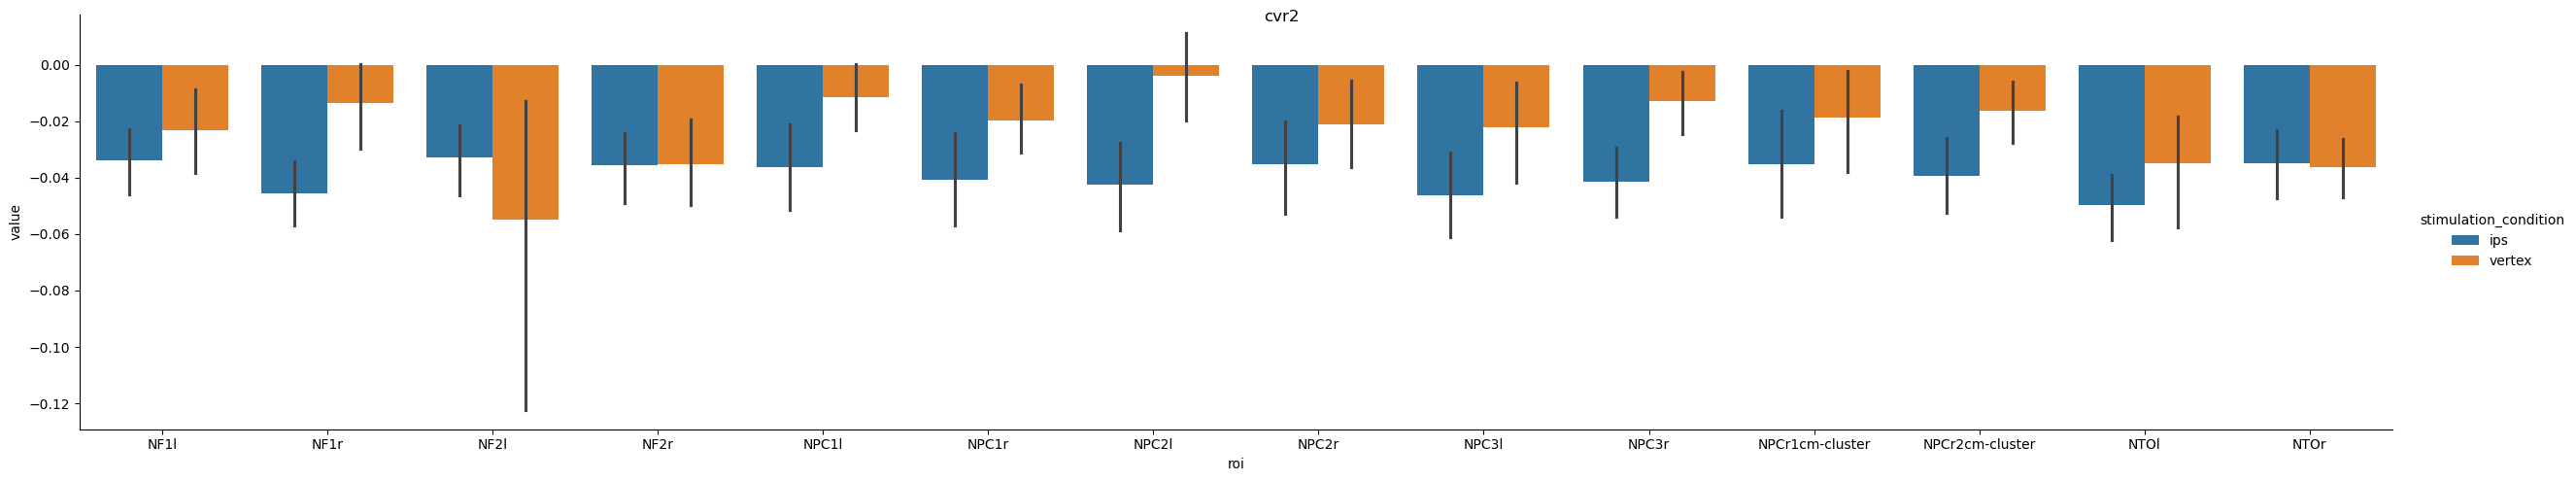

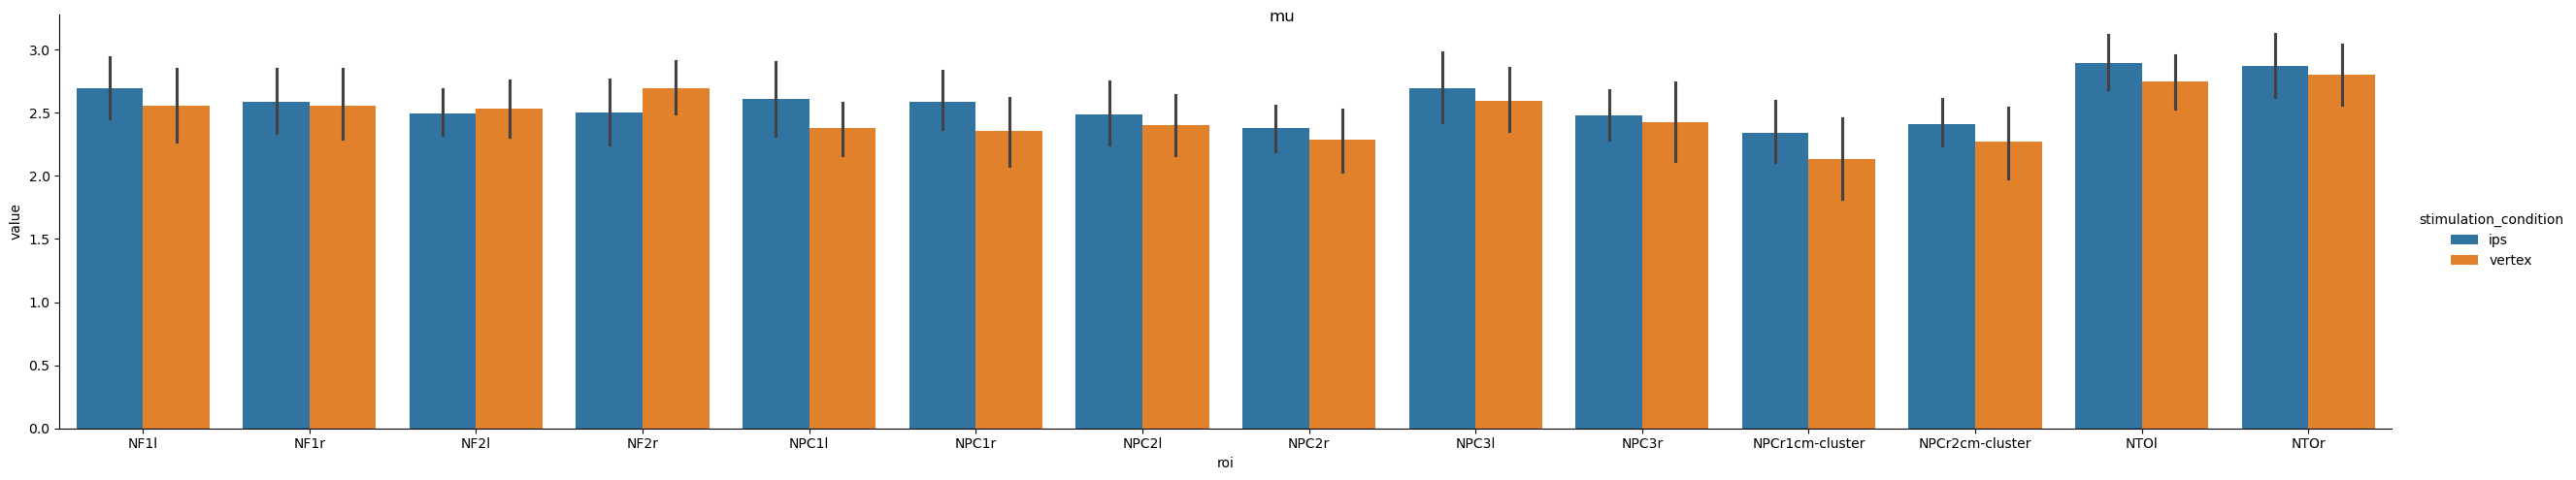

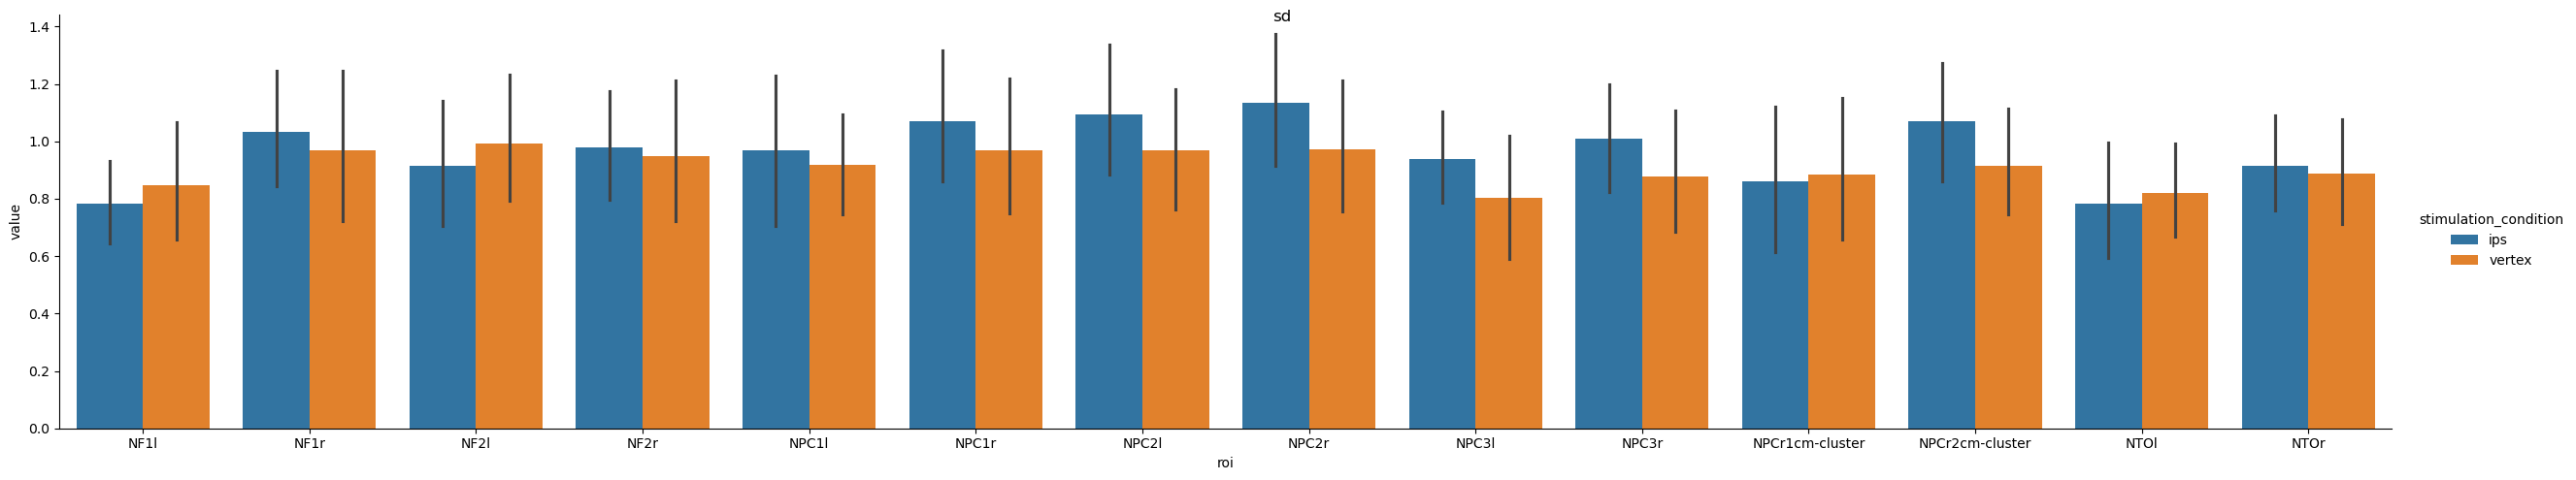

In [10]:
thr_pars = pars.droplevel('session').loc[mask]

tmp = thr_pars.groupby(['subject', 'stimulation_condition', 'roi']).mean().stack().to_frame('value')

for par, tmp2 in tmp.groupby('parameter'):
    #  tmp.drop('baseline', level='stimulation_condition').xs('amplitude', 0, 'parameter').groupby(['subject', 'stimulation_condition']).mean().reset_index()

    ax = sns.catplot(x='roi', hue='stimulation_condition', y='value', data=tmp2.reset_index(), kind='bar', aspect=5.)
    plt.gcf().suptitle(par)
    # print(pingouin.rm_anova(tmp2.reset_index(), 'value', 'stimulation_condition', 'subject'))
    print(par)
    display(tmp2.groupby(['roi']).apply(lambda d: pingouin.pairwise_tests(d.reset_index(), dv='value', within='stimulation_condition', subject='subject')).sort_values('p-unc'))